# Using DLPy to build ENet Model

## 1. Create the dataset

### 1.1 Load necessary modules

In [1]:
%matplotlib inline
import swat as sw
import sys

#import dlpy
from dlpy.network import *
from dlpy.utils import *
from dlpy.applications import *
from dlpy.model import *
from dlpy.images import *
from dlpy.layers import *

from matplotlib import pylab as plt

### 1.2 Connect to cas server

In [2]:
s = sw.CAS(host_name, port)

In [3]:
s.loadactionset('image')
s.loadactionset('deepLearn')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.


[actionset]

 'deepLearn'

+ Elapsed: 0.00476s, user: 0.00157s, sys: 0.00176s, mem: 0.221mb

In [4]:
s.table.addcaslib(activeonadd=False,
                  datasource={'srctype':'path'},
                  name='dnfs',
                  path='/disk/linux/dlpy',
                  subdirectories=True)

NOTE: Cloud Analytic Services added the caslib 'dnfs'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,dnfs,PATH,,/disk/linux/dlpy/,,1.0,1.0,0.0,0.0,0.0,0.0


### 1.3 Load self_driving data
Data is available at https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge (CARLA: An Open Urban Driving Simulator https://arxiv.org/abs/1711.03938). Training data can be created following https://github.com/sassoftware/python-dlpy/blob/master/examples/segmentation/image_segmentation_data_preparation.ipynb.

In [5]:
s.table.loadTable(caslib = 'dnfs', path = 'self_driving/self_driving_512_train.sashdat',
                  casout = dict(name = 'data', replace = True))

NOTE: Cloud Analytic Services made the file self_driving/self_driving_512_train.sashdat available as table DATA in caslib CASUSER(dxq77dxq).


[caslib]

 'CASUSER(dxq77dxq)'

[tableName]

 'DATA'

[casTable]

 CASTable('DATA', caslib='CASUSER(dxq77dxq)')

+ Elapsed: 0.00734s, user: 0.00314s, sys: 0.00325s, mem: 1.22mb

### 1.4 Visualize raw images and annotations

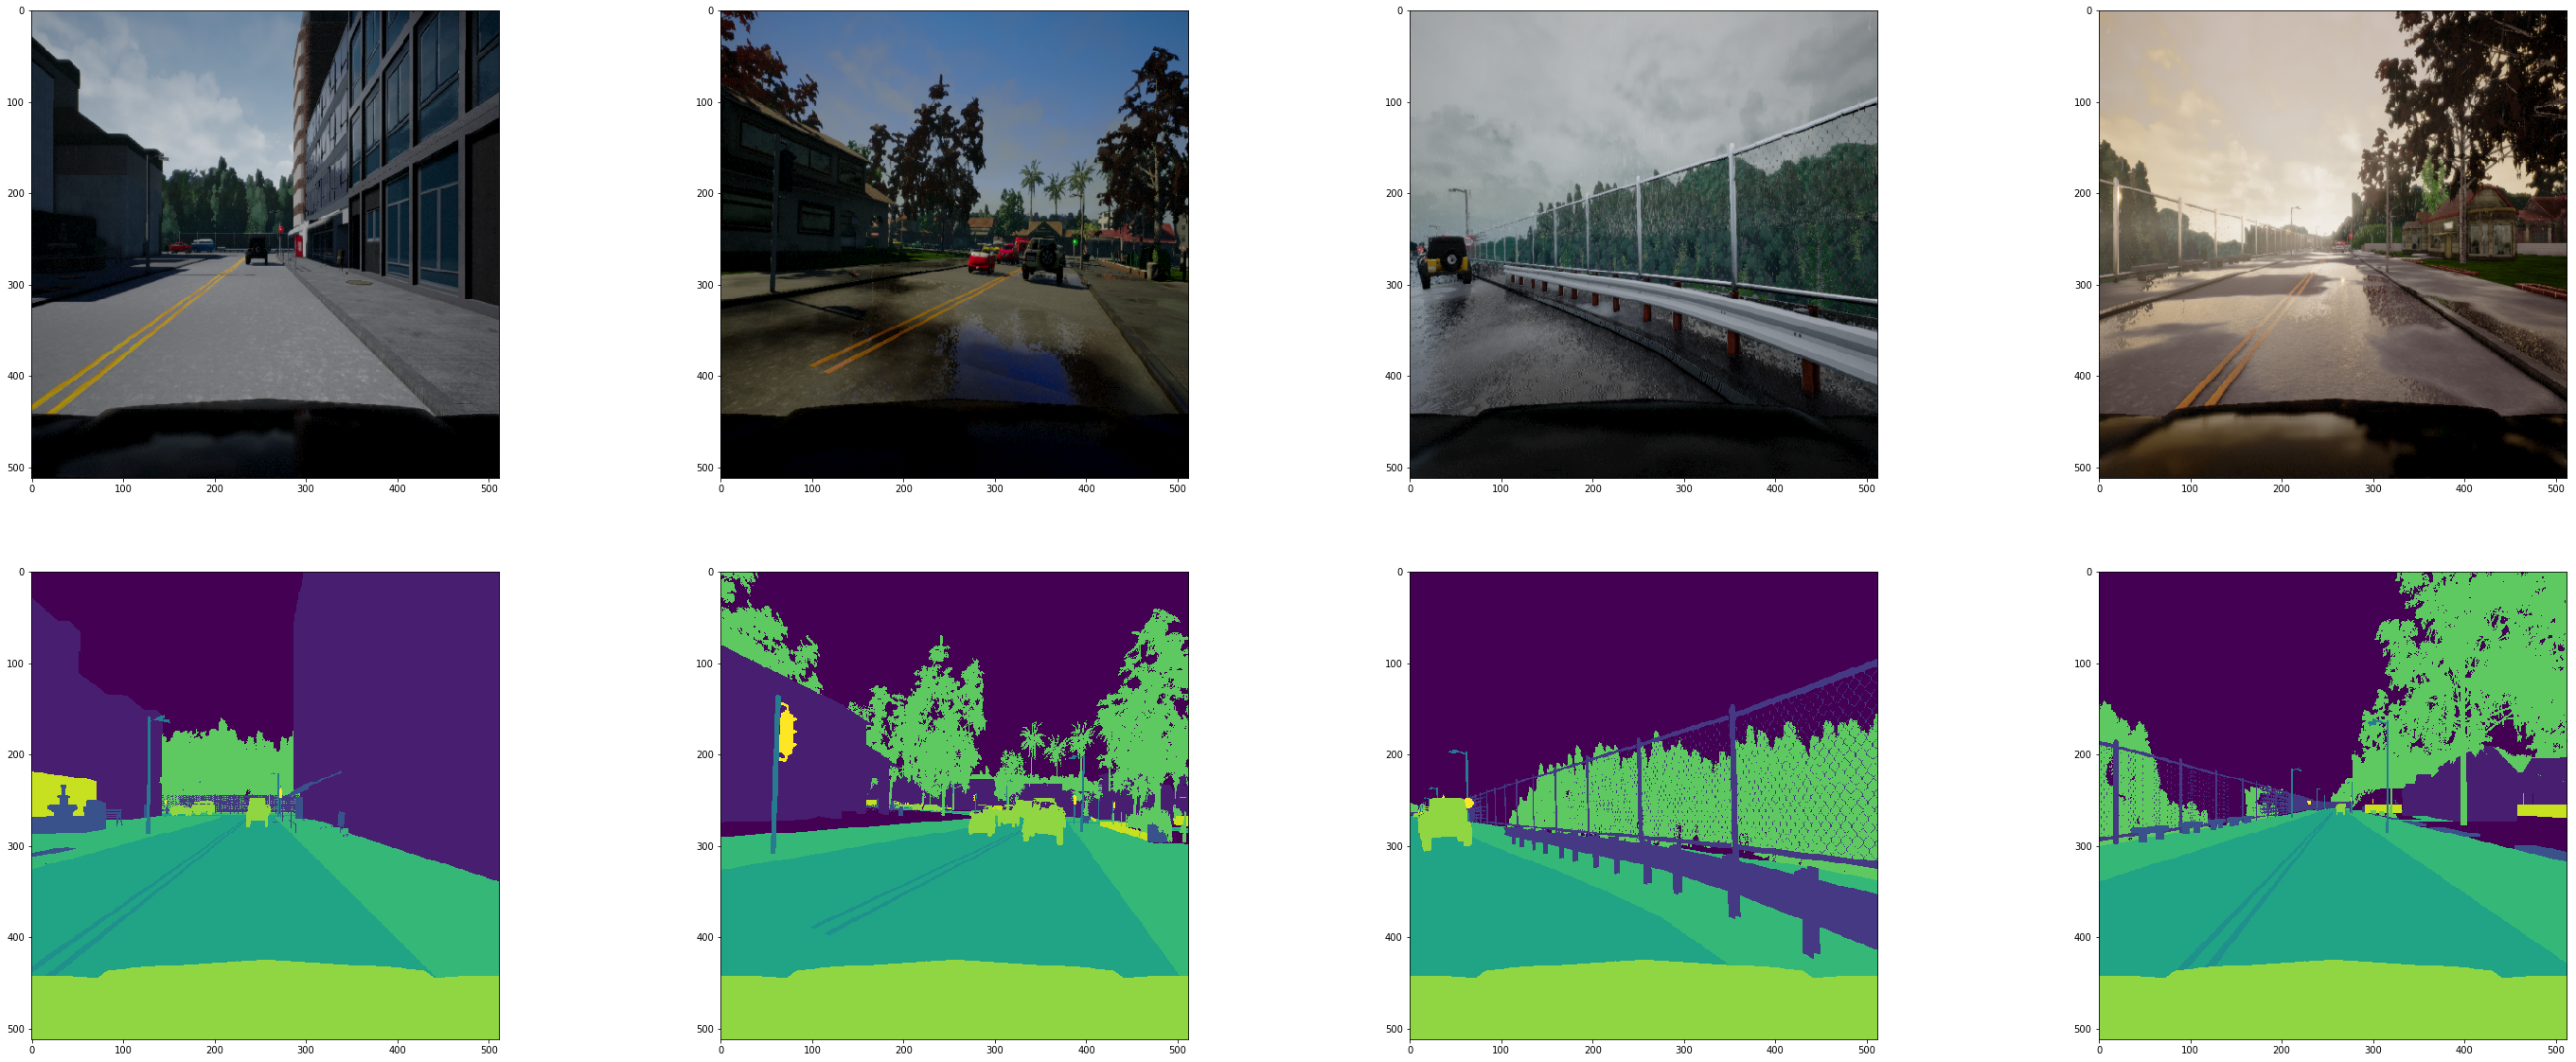

In [6]:
display_segmentation_images(s, 'data', n_images=4, segmentation_labels_table='data')

## 2. Build ENet model
ENet: A Deep Neural Network Architecture for Real-Time Semantic Segmentation https://arxiv.org/abs/1606.02147

In [7]:
model = ENet(s, n_classes=13, n_channels=3, output_image_type='PNG')

NOTE: Model compiled successfully.


In [8]:
model.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,InputLayer_1,input,,,None,"(512, 512, 3)","(0, 0)",0
1,1,Conv2d_1,convo,"(3, 3)","(2, 2)",Identity,"(256, 256, 13)","(351, 0)",23003136
2,2,BN_1,batchnorm,,,Relu,"(256, 256, 13)","(0, 26)",0
3,3,Pooling_1,pool,"(2, 2)","(2, 2)",Max,"(256, 256, 3)","(0, 0)",0
4,4,Concat_1,concat,,,Auto,"(256, 256, 16)","(0, 0)",0
5,5,Conv2d_2,convo,"(3, 3)","(2, 2)",Identity,"(128, 128, 4)","(576, 0)",9437184
6,6,BN_2,batchnorm,,,Relu,"(128, 128, 4)","(0, 8)",0
7,7,Conv2d_3,convo,"(3, 3)","(1, 1)",Identity,"(128, 128, 4)","(144, 0)",2359296
8,8,BN_3,batchnorm,,,Relu,"(128, 128, 4)","(0, 8)",0
9,9,Conv2d_4,convo,"(1, 1)","(1, 1)",Identity,"(128, 128, 64)","(256, 0)",4194304


## 3. Training

In [9]:
solver = AdamSolver(lr_scheduler=StepLR(learning_rate=0.0015, step_size=20, gamma=0.8), 
                    clip_grad_max = 100, 
                    clip_grad_min = -100)

optimizer = Optimizer(algorithm=solver, 
                      mini_batch_size=20, 
                      log_level=2, 
                      max_epochs=15, 
                      reg_l2=0.0005, 
                      seed=13309)

dataspecs=[dict(type='image', layer='InputLayer_1', data=['_image_']),
           dict(type='image', layer='Segmentation_1', data=['labels'])]

The following argument(s) learning_rate, learning_rate_policy, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [10]:
model.fit(data='data',
          optimizer=optimizer, 
          data_specs=dataspecs, 
          n_threads=4, 
          record_seed=54321,
          force_equal_padding=True, 
          gpu=dict(devices=[3]))

NOTE: Training from scratch.
NOTE: Using dlgrd009.unx.sas.com: 1 out of 4 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 216406.
NOTE:  The approximate memory cost is 1488.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       5.02 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 20.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 80.
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0        0.0015       4.101e+05     0.4892    64.89
NOTE:  1        0.0015        1.85e+05     0.2039    60.45
NOTE:  2        0.0015       1.224e+05     0.1244    60.58
NOTE:  3        0.0015       1.018e+05     0.1052    60.53
NOTE:  4        0.0015       9.094e+04    0.09434    60.46
NOTE:  5        0.00

,Descr,Value
0,Model Name,model_oagtkb
1,Model Type,Convolutional Neural Network
2,Number of Layers,150
3,Number of Input Layers,1
4,Number of Output Layers,0
5,Number of Convolutional Layers,61
6,Number of Pooling Layers,3
7,Number of Fully Connected Layers,0
8,Number of Batch Normalization Layers,63
9,Number of Residual Layers,17


## 4. Score using testing data

In [11]:
s.table.loadTable(caslib = 'dnfs', path = 'self_driving/self_driving_512_test.sashdat',
                  casout = dict(name = 'test', replace = True))

NOTE: Cloud Analytic Services made the file self_driving/self_driving_512_test.sashdat available as table TEST in caslib CASUSER(dxq77dxq).


[caslib]

 'CASUSER(dxq77dxq)'

[tableName]

 'TEST'

[casTable]

 CASTable('TEST', caslib='CASUSER(dxq77dxq)')

+ Elapsed: 0.00271s, user: 0.00139s, sys: 0.000307s, mem: 0.759mb

In [12]:
model.predict('test', n_threads=1, gpu=dict(devices=[3]), display_class_score_info='all')

NOTE: Using dlgrd009.unx.sas.com: 1 out of 4 available GPU devices.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           500
 1  Number of Observations Used           500
 2  Misclassification Error (%)      9.792381
 3           Pixel Accuracy (%)      90.20762
 4            Mean Accuracy (%)      42.35227
 5                 Mean IoU (%)      37.74223
 6   Frequency Weighted IoU (%)      82.48128
 7                   Loss Error      96817.81

[ClassScoreInfo]

            Level ClassName     Frequency    NumCorrect      Accuracy  \
 0              0         0      42159928      40821572      0.968255   
 1              1         1      13452175      11238893       0.83547   
 2              2         2       1137784             0             0   
 3              3         3       1198771             0             0   
 4              4         4         16591             0             0   
 5              5         5        669354             0             0   
 6              6         6       1001421             0             0   
 7              7         7      26216068      25754952      0.982411   
 8              8         8      10970499       9739402      0.887781   
 9              9         9      12031181      10272866      0.853854   
 10            10        10      20867856      20409256      0.978024   
 11            11        11       1261600             0             0   
 12            12        12         88764             0             0   
 
              IoU  
 0       90.97454  
 1       73.65106  
 2              0  
 3              0  
 4              0  
 5              0  
 6              0  
 7       90.92859  
 8       66.40052  
 9       73.30645  
 10      95.38782  
 11             0  
 12             0  

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(dxq77dxq)  Valid_Res_JfxZq5   500       10   
 
                                             casTable  
 0  CASTable('Valid_Res_JfxZq5', caslib='CASUSER(x...  

+ Elapsed: 16.3s, user: 13.1s, sys: 2.58s, mem: 1.06e+03mb

## 5. Visualize scoring results

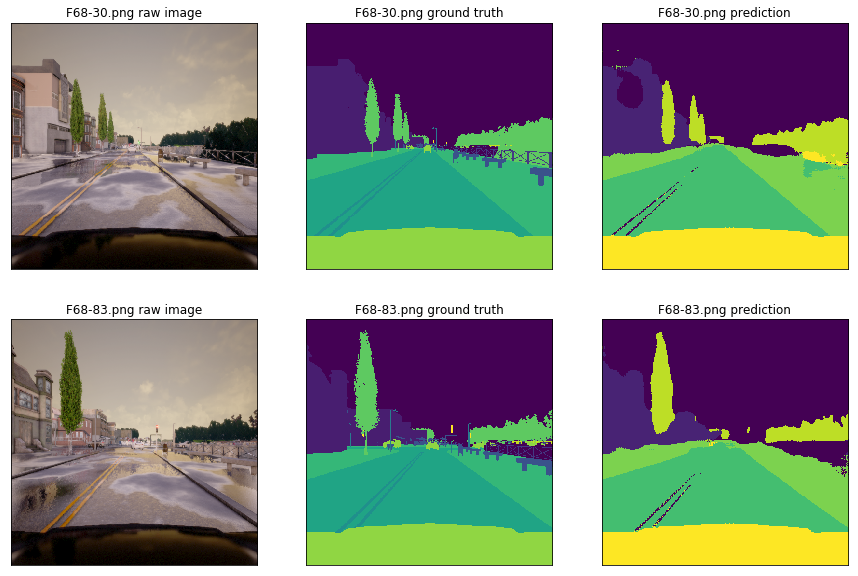

In [13]:
display_segmentation_results(s, 
                             model.valid_res_tbl, 
                             n_images=2, 
                             segmentation_labels_table=model.valid_res_tbl,
                             segmentation_prediction_table=model.valid_res_tbl,
                             prediction_column='_DL_PredImg_',
                             filename_column='_filename_0',
                             fig_size=(15,10))